In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

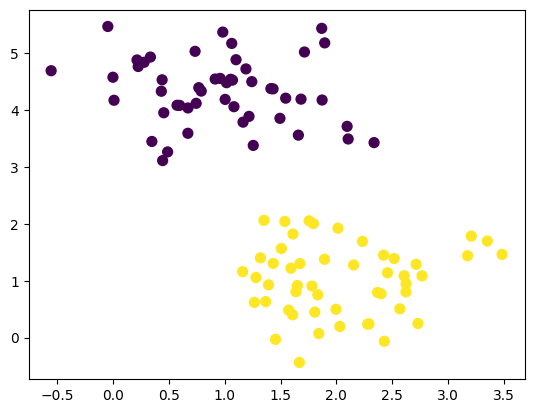

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

(-1.0, 4.0)

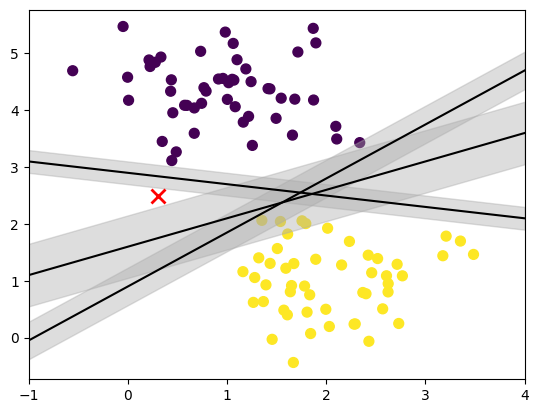

In [5]:
#You can classify those sets just with line but, there can be muktiplestart and end points. Dependes on that next point can be classify wrong.
xfit = np.linspace(-1, 4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.plot([0.3], [2.5], 'x', color='red', markeredgewidth=2, markersize=10) #Next point

for m, b, d in [(0.95, 0.9, 0.33), (0.5, 1.6, .55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, m * xfit + b, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color='#AAAAAA', alpha=0.4) 
    
plt.xlim(-1, 4)



In [6]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

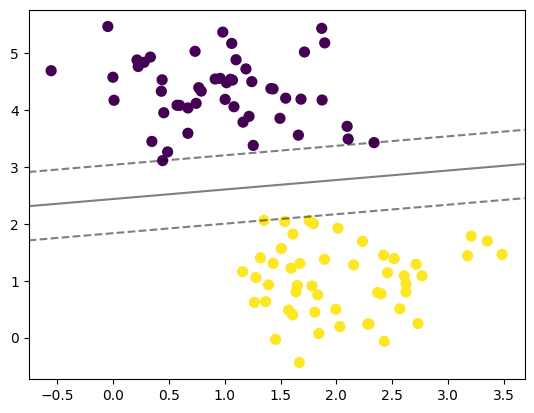

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(model);

In [8]:
#Points that are on the line, indicates the name of the algorithm. Commans model.support_vectors_ shows thier posotion. 
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

In [9]:
pip install ipywidgets

  Using cached ipywidgets-8.1.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.11-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.3-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.11-py3-none-any.whl (2.3 MB)
Note: you may need to restart the kernel to use updated packages.


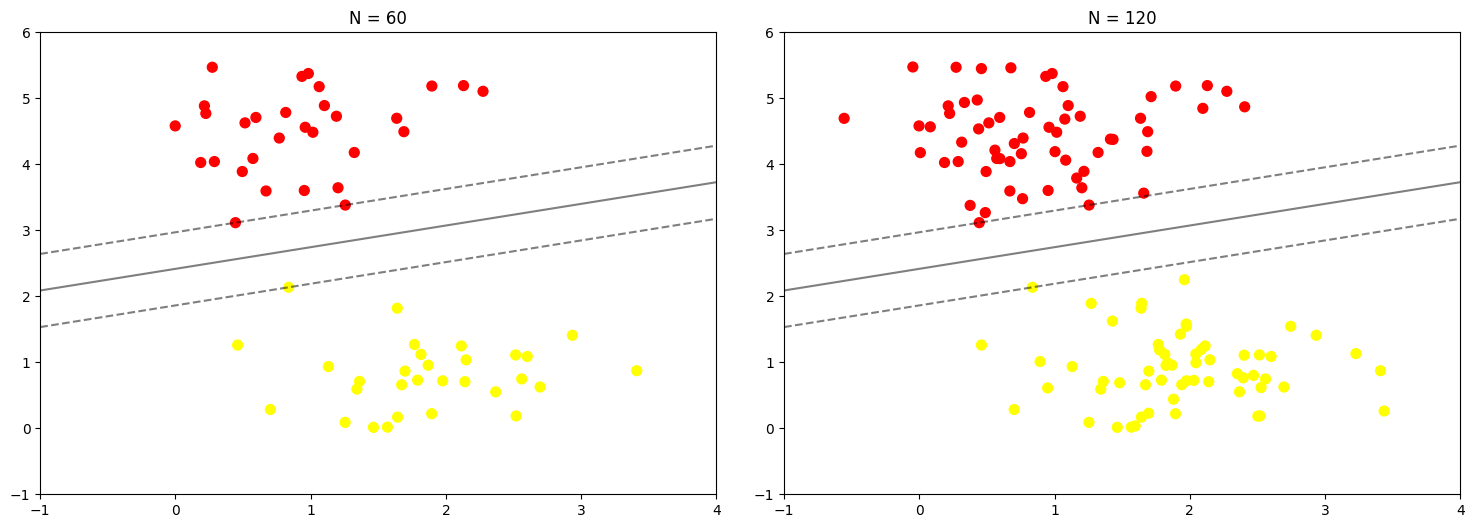

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Kernel SVM

In [11]:
from sklearn.datasets import make_circles

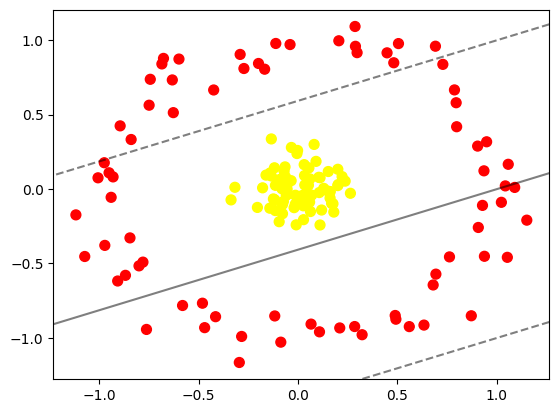

In [12]:
X, y = make_circles(n_samples=150, factor=.1, noise=.1)
clf = SVC(kernel='linear'). fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

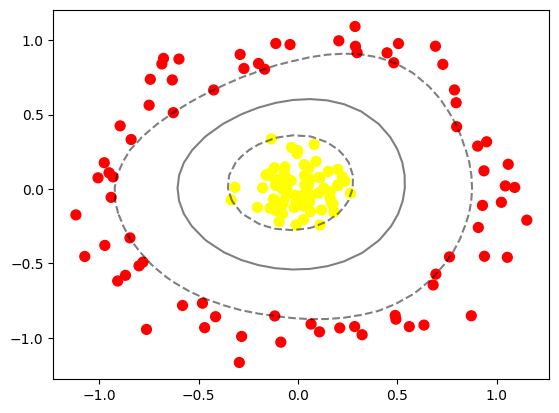

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Face Recognition

In [14]:
from sklearn.datasets import fetch_lfw_people

In [15]:
faces = fetch_lfw_people(min_faces_per_person=75)

In [16]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Tony Blair']
(1217, 62, 47)


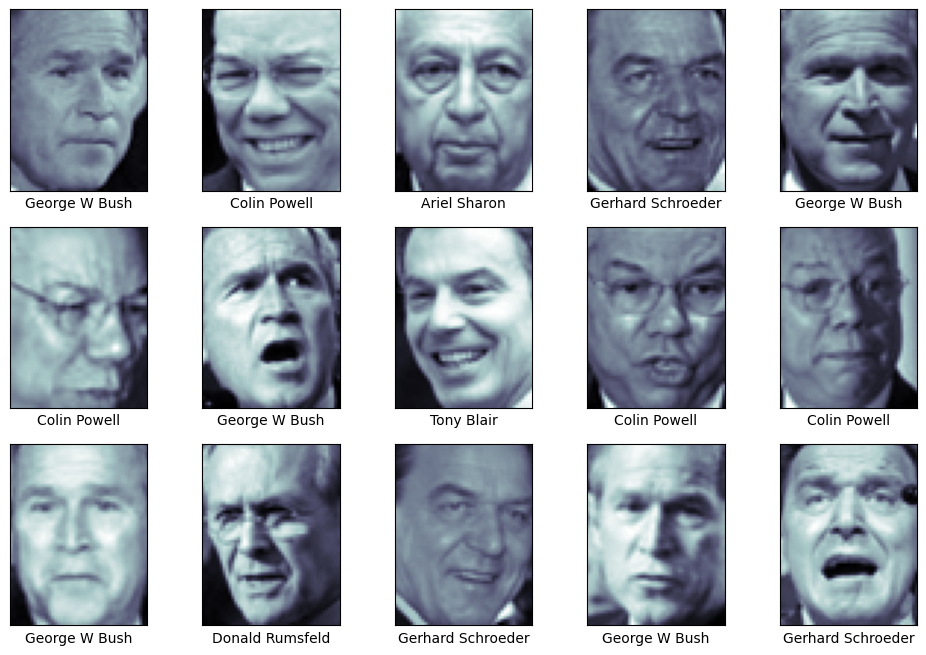

In [17]:
fig, ax = plt.subplots(3,5, figsize=(12,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel = faces.target_names[faces.target[i]])
    

In [18]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [19]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 2min 42s, sys: 1.4 s, total: 2min 44s
Wall time: 29.8 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [23]:
model = grid.best_estimator_
yfit = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.50      0.64        14
     Colin Powell       0.91      0.78      0.84        65
  Donald Rumsfeld       0.92      0.70      0.79        33
    George W Bush       0.78      0.98      0.87       133
Gerhard Schroeder       0.94      0.70      0.80        23
       Tony Blair       0.94      0.78      0.85        37

         accuracy                           0.84       305
        macro avg       0.89      0.74      0.80       305
     weighted avg       0.86      0.84      0.84       305



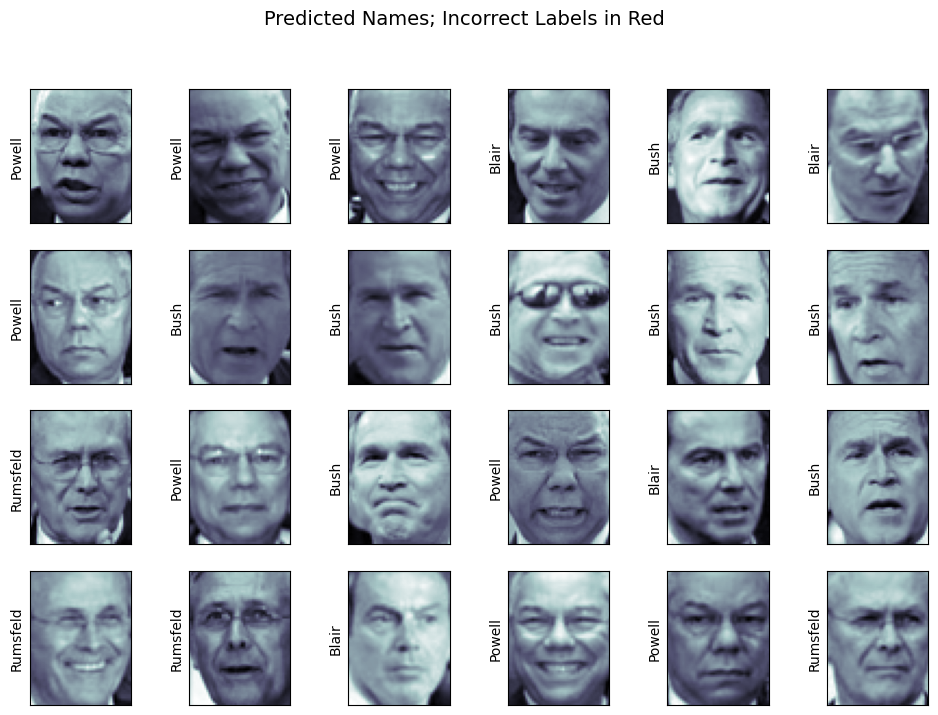

In [25]:
fig, ax = plt.subplots(4, 6, figsize=(12,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);